# 01-Fourier Discrete Transformation

In [1]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt


[16]


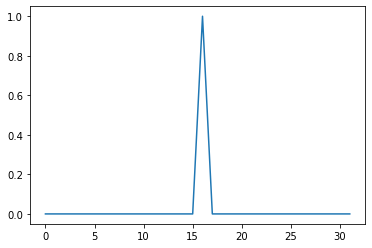

In [2]:
t = np.arange(32, dtype=np.int32)
f1 = 20
shft1 = 4
data1 = np.where((t + shft1)%f1 == 0, 1, 0)
print(np.nonzero(data1==1)[0])
plt.plot(data1)

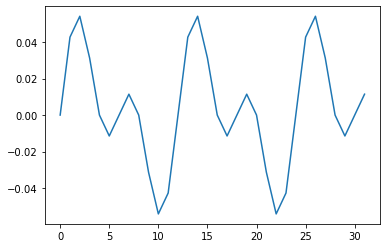

In [4]:
shft2 = 0
f2 = np.pi/6
delta_f2 = np.pi/20
f4 = np.pi/3
#t=np.arange(1024)
data2 = np.sin(t*f2-shft2) # np.sin(t*f1-shft1)
#data3 = np.cos(t*f2-shft2) + np.cos(t*(f2+delta_f2)-shft2)
data4 = (data2 + np.sin(t*f4-shft2) ) /32
#print(data)
plt.plot(data4)

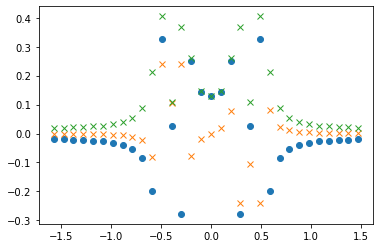

In [5]:
data_fft = fft.fft(data4)
freq = fft.fftfreq(t.shape[-1])
plt.plot(np.pi*freq, np.real(data_fft),'o')
plt.plot(np.pi*freq, np.imag(data_fft),'x')
plt.plot(np.pi*freq, np.abs(data_fft),'x')

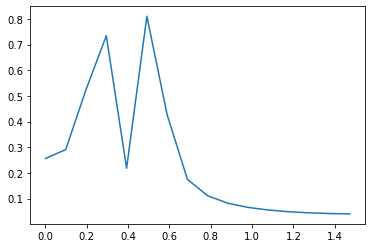

In [18]:
plt.plot(np.pi*freq[freq>=0], np.abs((data_fft)[freq>=0])*2)

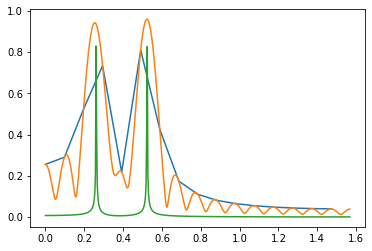

In [19]:
zero_padded_data = np.concatenate([data4, np.zeros(1024-t.max()-1)])
t_big = np.arange(1024)
large_window_data = (np.sin(t_big*f2-shft2) + np.sin(t_big*f4-shft2) )/1024

zero_padded_data_fft = fft.fft(data4, 1024)
large_window_data_fft = fft.fft(large_window_data)
freq_big = fft.fftfreq(t_big.shape[-1])
plt.plot(np.pi*freq[freq>=0], np.abs((data_fft)[freq>=0])*2)
plt.plot(np.pi*freq_big[freq_big>=0], np.abs((zero_padded_data_fft)[freq_big>=0])*2)
plt.plot(np.pi*freq_big[freq_big>=0], np.abs((large_window_data_fft)[freq_big>=0])*2)

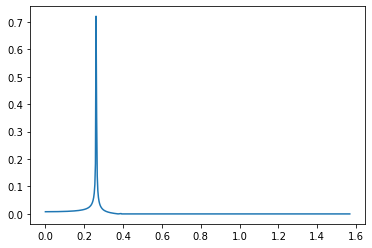

In [21]:
filt = np.where(np.linspace(0,1,512)>0.25, 0, 1)
plt.plot(np.pi*freq_big[freq_big>=0], filt*np.abs(np.real(large_window_data_fft)[freq_big>=0])*2)
filt_t = fft.ifft(filt)


/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


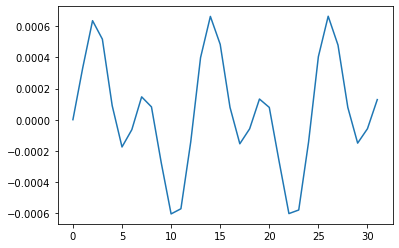

In [24]:
plt.plot(np.convolve(large_window_data, filt_t)[:32])